Epoch 1/100
46/46 [==============================] - 9s 69ms/step - loss: 0.0296
Epoch 2/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0062
Epoch 3/100
46/46 [==============================] - 3s 70ms/step - loss: 0.0058
Epoch 4/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0051
Epoch 5/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0054
Epoch 6/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0046
Epoch 7/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0047
Epoch 8/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0048
Epoch 9/100
46/46 [==============================] - 3s 71ms/step - loss: 0.0041
Epoch 10/100
46/46 [==============================] - 3s 70ms/step - loss: 0.0043
Epoch 11/100
46/46 [==============================] - 3s 71ms/step - loss: 0.0036
Epoch 12/100
46/46 [==============================] - 3s 75ms/step - loss: 0.0038
Epoch 13/100
46/46 [=====

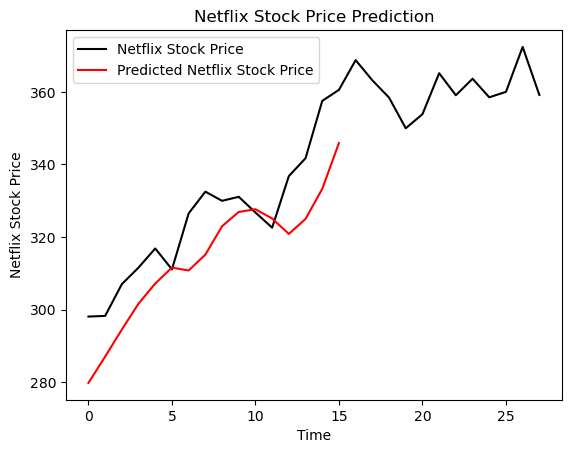

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 
#reading the training dataset
train_dataset = pd.read_csv("C://Users//ADMIN//Downloads//NFLX_train.csv")
train_set = train_dataset.iloc[:, 1:2].values
train_dataset.head()
#resizing the data
sc = MinMaxScaler(feature_range=(0,1))
resized_train_set = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, len(resized_train_set)):
    X_train.append(resized_train_set[i-60:i, 0])
    y_train.append(resized_train_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#modelling using Long Short-Term Memory algorithm 
lstm_mod = Sequential()
lstm_mod.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
lstm_mod.add(Dropout(0.2))
lstm_mod.add(LSTM(units=50,return_sequences=True))
lstm_mod.add(Dropout(0.2))
lstm_mod.add(LSTM(units=50,return_sequences=True))
lstm_mod.add(Dropout(0.2))
lstm_mod.add(LSTM(units=50))
lstm_mod.add(Dropout(0.2))
lstm_mod.add(Dense(units=1))
lstm_mod.compile(optimizer='adam',loss='mean_squared_error')
lstm_mod.fit(X_train,y_train,epochs=100,batch_size=32)
#reading the test dataset
test_data_set = pd.read_csv("C://Users//ADMIN//Downloads//NFLX_test.csv")
actual_stock_price = test_data_set.iloc[:, 1:2].values
total_data_set = pd.concat((train_dataset['Open'], test_data_set['Open']), axis = 0)
inp_val = total_data_set[len(total_data_set) - len(test_data_set) - 60:].values
inp_val = inp_val.reshape(-1,1)
inp_val = sc.transform(inp_val)
X_test = []
for i in range(60, 76):
    X_test.append(inp_val[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_value_stock = lstm_mod.predict(X_test)
pred_value_stock = sc.inverse_transform(pred_value_stock)
#plotting and observing the graph
plt.plot(actual_stock_price, color = 'black', label = 'Netflix Stock Price')
plt.plot(pred_value_stock, color = 'red', label = 'Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()
